<a href="https://colab.research.google.com/github/frankthairu/Week-9-Modelling-IP/blob/main/Francis_Thairu_KNN_modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining Data Question

##a) Specifying the Question
We are building a model that determines whether or not a person survived in the titatic given other features.

##b) Defining the Metric for success.
This project will be considered a success when we develop a classification model that has a high accuracy score of between 70% and 95% 

We will also be calculating the RMSEs but that will not the main determinant for our project.

##c) Understanding the context
The datasets that we will be using are the titatinc datasets with the following column names and descriptions.

* Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

* survival : Survival (0 = No; 1 = Yes)

* name : Name

* sex : Sex

* age : Age

* sibsp : Number of Siblings/Spouses Aboard

* parch : Number of Parents/Children Aboard

* ticket : Ticket Number

* fare : Passenger Fare (British pound)

* cabin : Cabin

* embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)






##d) Recording the experimental design.
The following steps will be followed in conducting this study: 
* Define the question, the metric for success, the context, experimental design taken.

* Read and explore the given dataset.


* Define the appropriateness of the available data to answer the given question.

* Find and deal with outliers, anomalies, and missing data within the dataset.

* Perform univariate and bivariate analysis and recording our observations.
* Performing prediction, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

* We will then compute the accuracy (percentage of correct classification)and report the confusion matrix of each classifier.
Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling

##e) Data Relevance
The data we will be using can be found in the link below

* https://archive.org/download/train5_202002/train%20%285%29.csv

* https://archive.org/download/test1_202002/test%20%281%29.csv


# Importing relevant libraries

In [3]:
%matplotlib inline

#importing our necessary libraries
from sklearn import metrics
import seaborn as sb
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Reading our data

In [4]:
#we import and read our datasets
train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

In [5]:
#we preview our train dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#we preview our test dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data understanding

VARIABLE DESCRIPTIONS
* Pclass :  Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

* survival : Survival (0 = No; 1 = Yes)

* name : Name

* sex : Sex

* age : Age

* sibsp : Number of Siblings/Spouses Aboard

* parch : Number of Parents/Children Aboard

* ticket : Ticket Number

* fare : Passenger Fare (British pound)

* cabin : Cabin

* embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


SPECIAL NOTES


---


* Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5

* Fare is in Pre-1970 British Pounds ()
Conversion Factors: 1 = 12s = 240d and 1s = 20d



---

With respect to the family relation variables (i.e. sibsp and parch) some relations were
ignored. The following are the definitions used for sibsp and parch.

* Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

* Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances
Ignored)

* Parent: Mother or Father of Passenger Aboard Titanic

* Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces,
aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0
for them. As well, some travelled with very close friends or neighbors in a village,
however, the definitions do not support such relations.

In [7]:
# Checking if there are missing values 
print("Train dataset")
print("_______________")
print(train.isnull().sum())
print("")
print("*******************")
print("Test dataset")
print("_______________")
print(test.isnull().sum())

Train dataset
_______________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*******************
Test dataset
_______________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can see that in both datasets cabin column has many null values thus we will drop the column.

The age column has null values as well but we will fill the null values since the age column is essential

In [8]:
#checking shape of our datasets
print("Train dataset")
print("_______________")
print(test.shape)
print("")
print("*******************")
print("Test dataset")
print("_______________")
print(train.shape)

Train dataset
_______________
(418, 11)

*******************
Test dataset
_______________
(891, 12)


In [9]:
#checking info on our datasets
print("Train dataset")
print("_______________")
print(test.info())
print("")
print("*******************")
print("Test dataset")
print("_______________")
print(train.info())

Train dataset
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

*******************
Test dataset
_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [10]:
# Checking if there are missing values 
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data cleaning

#### Train dataset

In [11]:
# We  fill the missing values in our columns 
# For our age columns we will fill the null values with the mean 

columns = ['Age']

for column in columns:
    train[column] = train[column].fillna(train[column].mean())

# for the embarked column, we will fill the null values with zero

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# checking to see if the null are replaced
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We replace null values in age with the mean and in the embarked column with 0

In [12]:
#Cleaning our data
#dropping column that we dont need
train.drop(['PassengerId','Ticket','Cabin','Name'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We dropped columns that have no use in our modelling. 

##### Checking Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

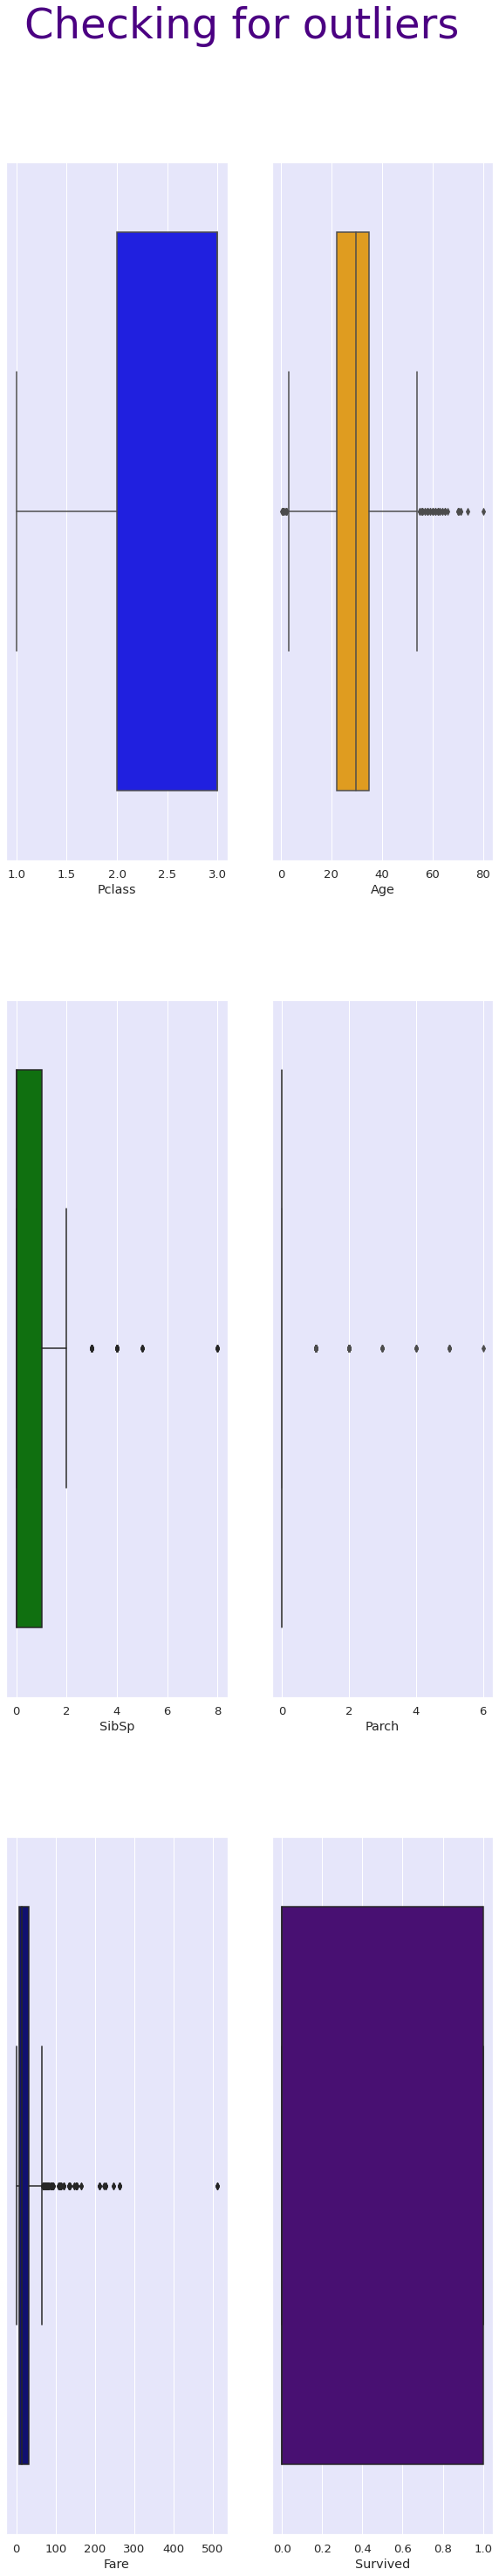

In [13]:

#we check for outliers in or main columns

column_list = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Survived']
colors = ['blue', 'orange','green','grey','navy', 'indigo']

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 50))
plt.suptitle('Checking for outliers', fontsize = 48, y = 0.93, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), train, column_list, colors):
  sns.boxplot(train[column], ax = ax, color = color)
  ax.set_facecolor('lavender') 
  #we wont drop outliers for they take up most of our data

We  can see that outliers make up most part of our dataset and removing them would rmove most part of our dataset so we leave them.

Oultliers are also important in our modelling

#### Test dataset

In [14]:
# We  fill the missing values in our columns 
# For our age columns we will fill the null values with the mean 

columns = ['Age']

for column in columns:
    test[column] = test[column].fillna(test[column].mean())

# for the embarked column, we will fill the null values with zero

test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# checking to see if the null are replaced
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We replace null values in age with the mean and in the embarked column with 0

In [15]:
#Cleaning our data
#dropping column that we dont need
test.drop(['PassengerId','Ticket','Cabin','Name'], axis = 1, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


We dropped columns that have no use in our modelling. 

##### Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

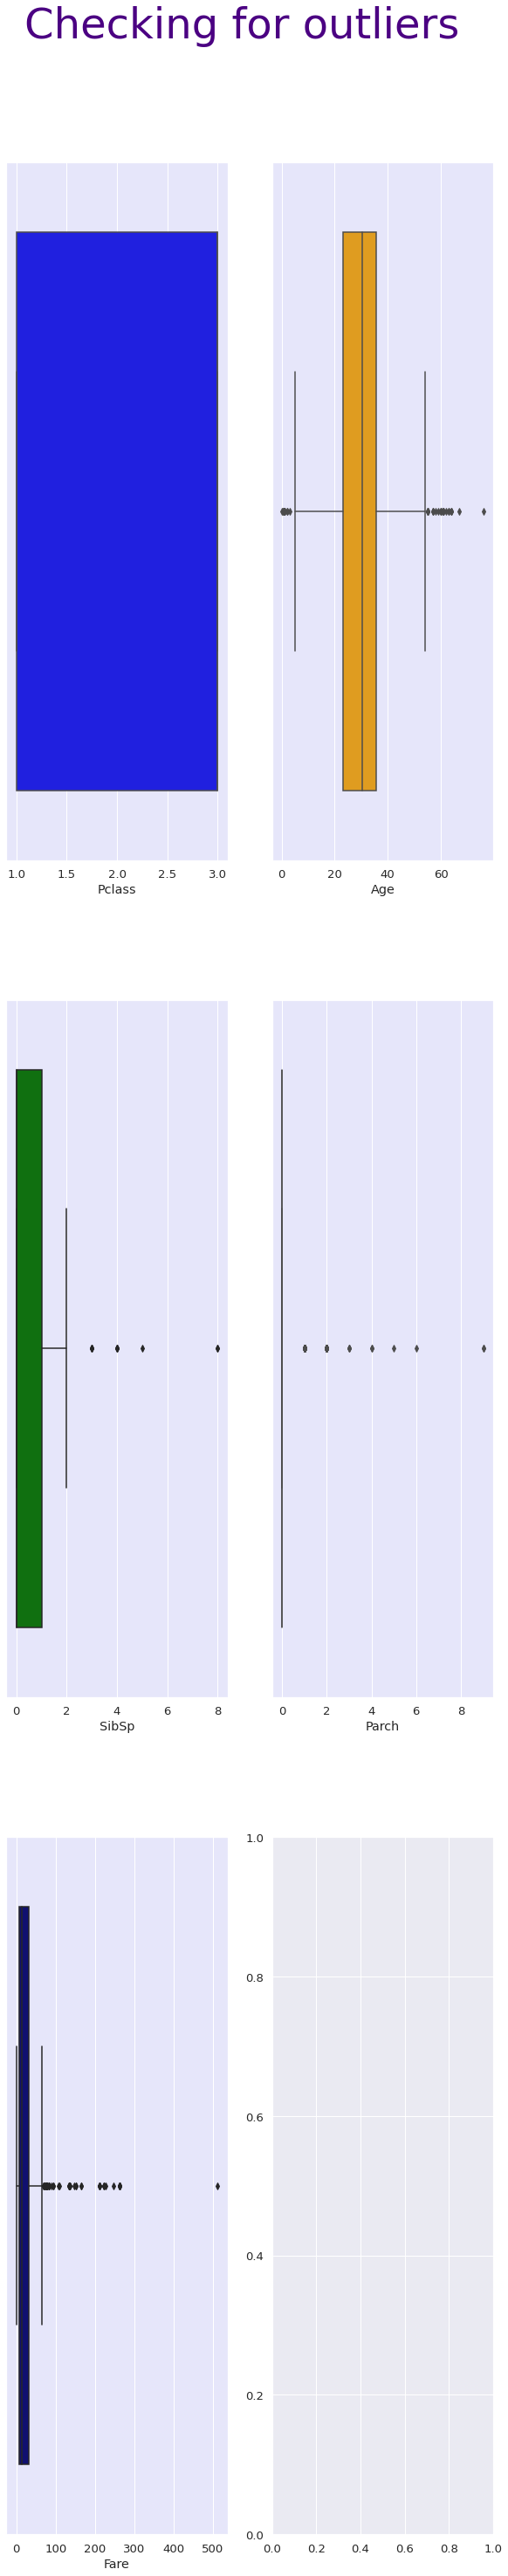

In [16]:

#we check for outliers in or main columns

column_list = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
colors = ['blue', 'orange','green','grey','navy']

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 50))
plt.suptitle('Checking for outliers', fontsize = 48, y = 0.93, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), test, column_list, colors):
  sns.boxplot(test[column], ax = ax, color = color)
  ax.set_facecolor('lavender') 
  #we wont drop outliers for they take up most of our data

We  can see that outliers make up most part of our dataset and removing them would rmove most part of our dataset so we leave them.

Oultliers are also important in our modelling

#### Exporting our new datasets

In [17]:
#We export our cleaned dataset into a csv file
#
train.to_csv('New_train.csv',index = False, header = True)
test.to_csv('New_test.csv',index = False, header = True)

In [18]:
train_1=pd.read_csv("New_train.csv")
test_1=pd.read_csv("New_test.csv")

# Exploratory Analysis

For our exploratory Analysis we will be using the train dataset because it has the survived column unlike the test dataset. 

This is because  the survival column is what we are trying to predict.

#### Univariate analysis

In [19]:
#checking the dataset description
train_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# Print unique values for each column
for column in train.columns:
  print("Column: ",column)
  print("Number of Unique observations: ",train[column].nunique())
  print("Unique Observations:\n",train[column].unique())
  print("")
  print("**********************************")

Column:  Survived
Number of Unique observations:  2
Unique Observations:
 [0 1]

**********************************
Column:  Pclass
Number of Unique observations:  3
Unique Observations:
 [3 1 2]

**********************************
Column:  Sex
Number of Unique observations:  2
Unique Observations:
 ['male' 'female']

**********************************
Column:  Age
Number of Unique observations:  89
Unique Observations:
 [22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.   

We can see here that we have the survived column unlike in the test dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

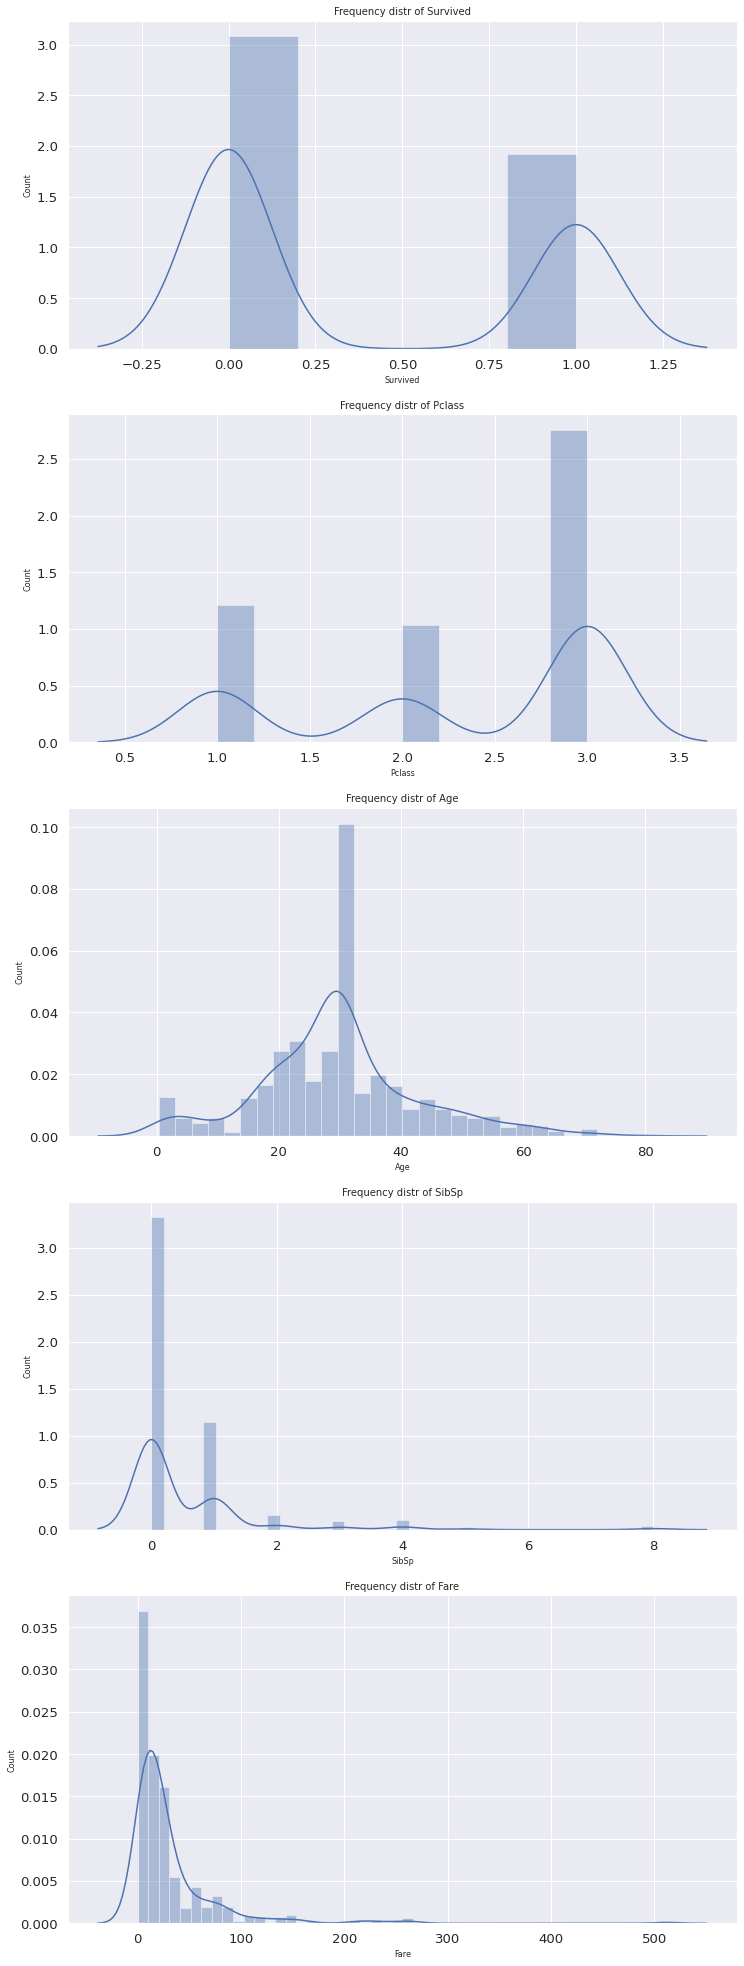

In [21]:
column_names = ['Survived','Pclass','Age','SibSp','Fare']

fig, ax = plt.subplots(len(column_names), figsize=(12,35))

for i, col_val in enumerate(column_names):

    sns.distplot(train_1[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distr of '     +col_val    , fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

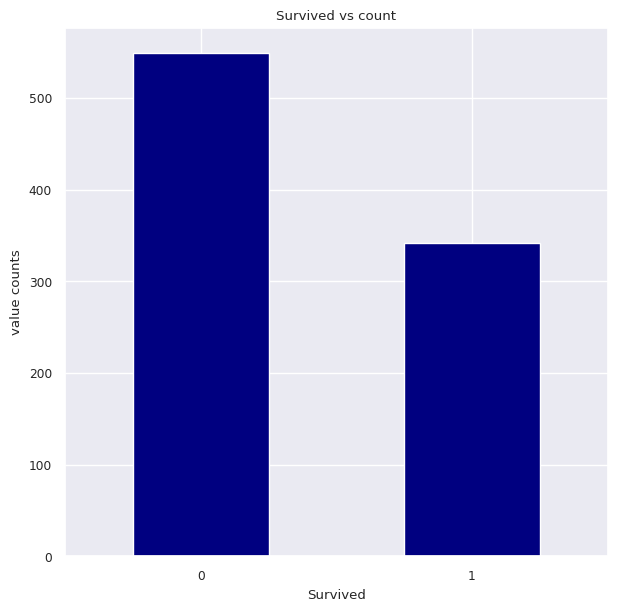


***********


0    549
1    342
Name: Survived, dtype: int64

In [22]:
#creating a bar graph of people who survived
#
sns.set(font_scale=0.8)


plt.figure(figsize = (7,7), dpi = 100)
train_1.Survived.value_counts().head()
train_1.Survived.value_counts().head().plot(kind= 'bar',color='navy',rot=0)
plt.title('Survived vs count')
plt.xlabel('Survived')
plt.ylabel('value counts')

plt.show()

print("")
print("***********")
train_1.Survived.value_counts()

Many people did not survive the titanic.

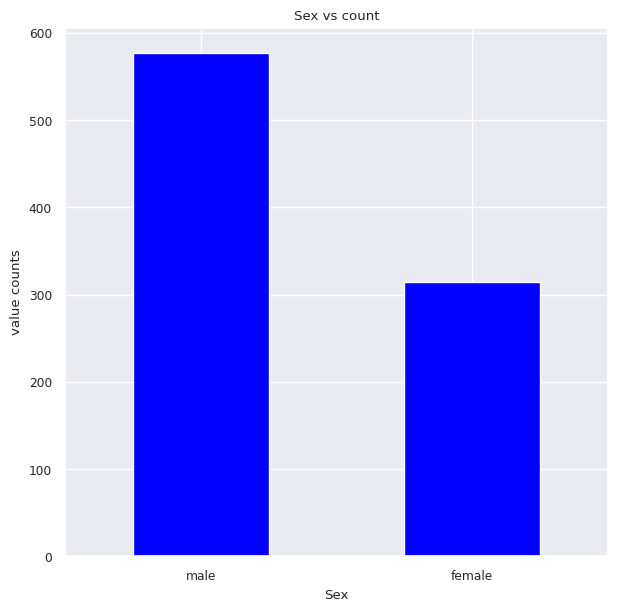


***********


male      577
female    314
Name: Sex, dtype: int64

In [23]:
#creating a bar graph of sex
#
sns.set(font_scale=0.8)


plt.figure(figsize = (7,7), dpi = 100)
train_1.Sex.value_counts().head()
train_1.Sex.value_counts().head().plot(kind= 'bar',color='blue',rot=0)
plt.title('Sex vs count')
plt.xlabel('Sex')
plt.ylabel('value counts')

plt.show()

print("")
print("***********")
train_1.Sex.value_counts()

There were more males in the titanic compared to the females

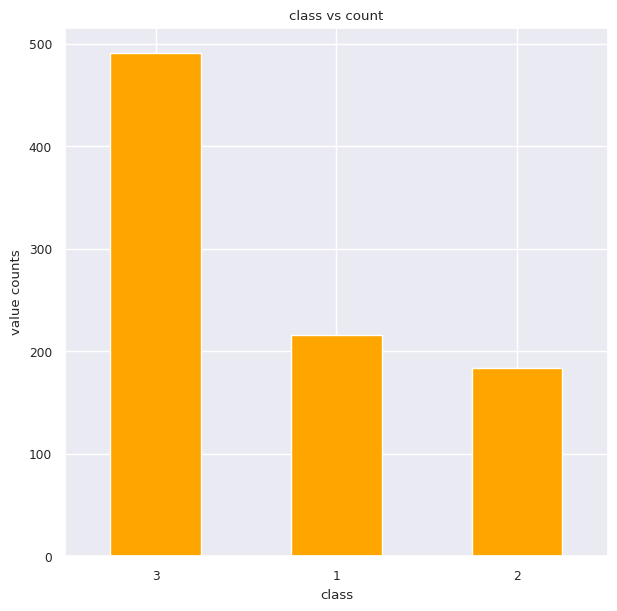


***********


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
#creating a bar graph of passenger class
#
sns.set(font_scale=0.8)


plt.figure(figsize = (7,7), dpi = 100)
train_1.Pclass.value_counts().head()
train_1.Pclass.value_counts().head().plot(kind= 'bar',color='orange',rot=0)
plt.title('class vs count')
plt.xlabel('class')
plt.ylabel('value counts')

plt.show()

print("")
print("***********")
train_1.Pclass.value_counts()

Many people were in the 3rd class

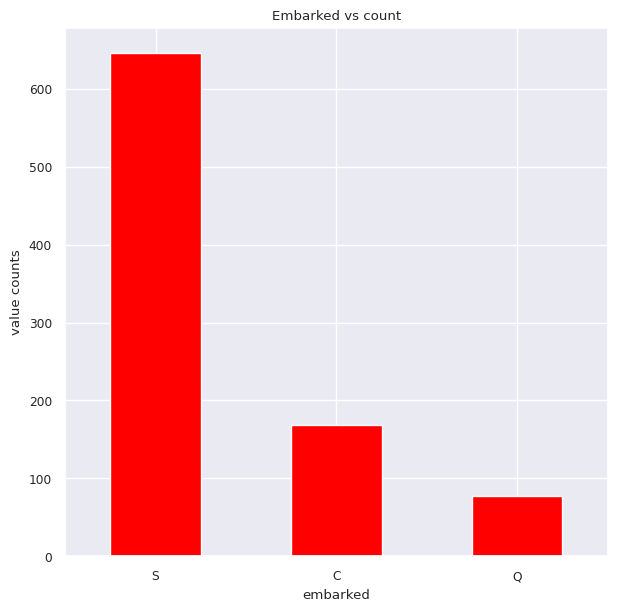


***********


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
#creating a bar graph of area of embarkment
#
sns.set(font_scale=0.8)


plt.figure(figsize = (7,7), dpi = 100)
train_1.Embarked.value_counts().head()
train_1.Embarked.value_counts().head().plot(kind= 'bar',color='red',rot=0)
plt.title('Embarked vs count')
plt.xlabel('embarked')
plt.ylabel('value counts')

plt.show()

print("")
print("***********")
train_1.Embarked.value_counts()

Many people embarked the train at Southampton

#### Bivariate Analysis

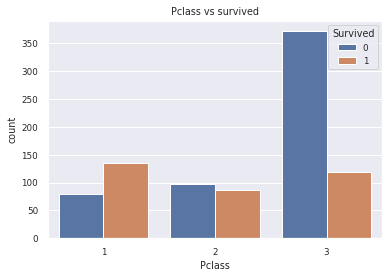

In [26]:
# We see the survivers in accordance to class
sns.countplot(x='Pclass',hue = "Survived", data = train_1)
plt.title('Pclass vs survived')
plt.show()

* We see that many people in 1st class survived.

* We can also see that in 2nd and 3rd class, many people did not survive comparing to those who survived

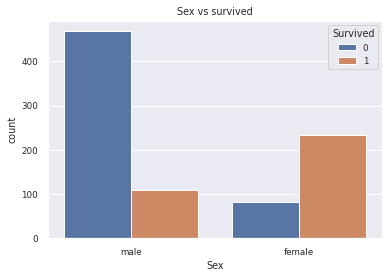

In [27]:
# We see the survivers in accordance to class
sns.countplot(x='Sex',hue = "Survived", data = train_1)
plt.title('Sex vs survived')
plt.show()


We can see that many females survived compared to those who did not survive while in the male, most did not survive

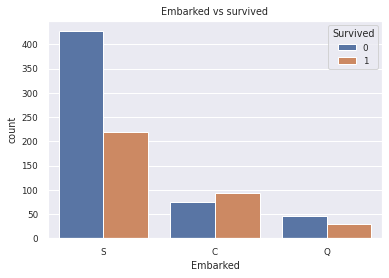

In [28]:
# We see the survivers in accordance to class
sns.countplot(x='Embarked',hue = "Survived", data = train_1)
plt.title('Embarked vs survived')
plt.show()


* Many people who boarded at Sothampton did not survive

* Many people who boarded at Cherboug survived

* Many people who boarded at Queenstown did not survive

##### Detecting multicollinearity

In [29]:
multicollinearity = train_1.corr()
multicollinearity

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


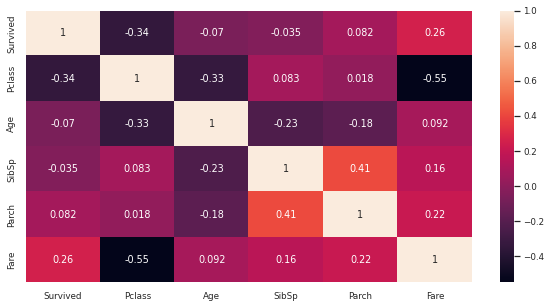

In [30]:
plt.figure(figsize=(10,5))
sb.heatmap(multicollinearity, annot=True)

Since we are mainly interested in survival rate, we will compare the correlation of survival column with other columns. From the heat map we conclude the following.
* There is alow correlation between survived and fare

* There is a very low correlation between survived and parch
* There is a negative correlation between survived and sibsp
* There is a negative correlation between survived and Age
* There is a negative correlation between survived and pclass


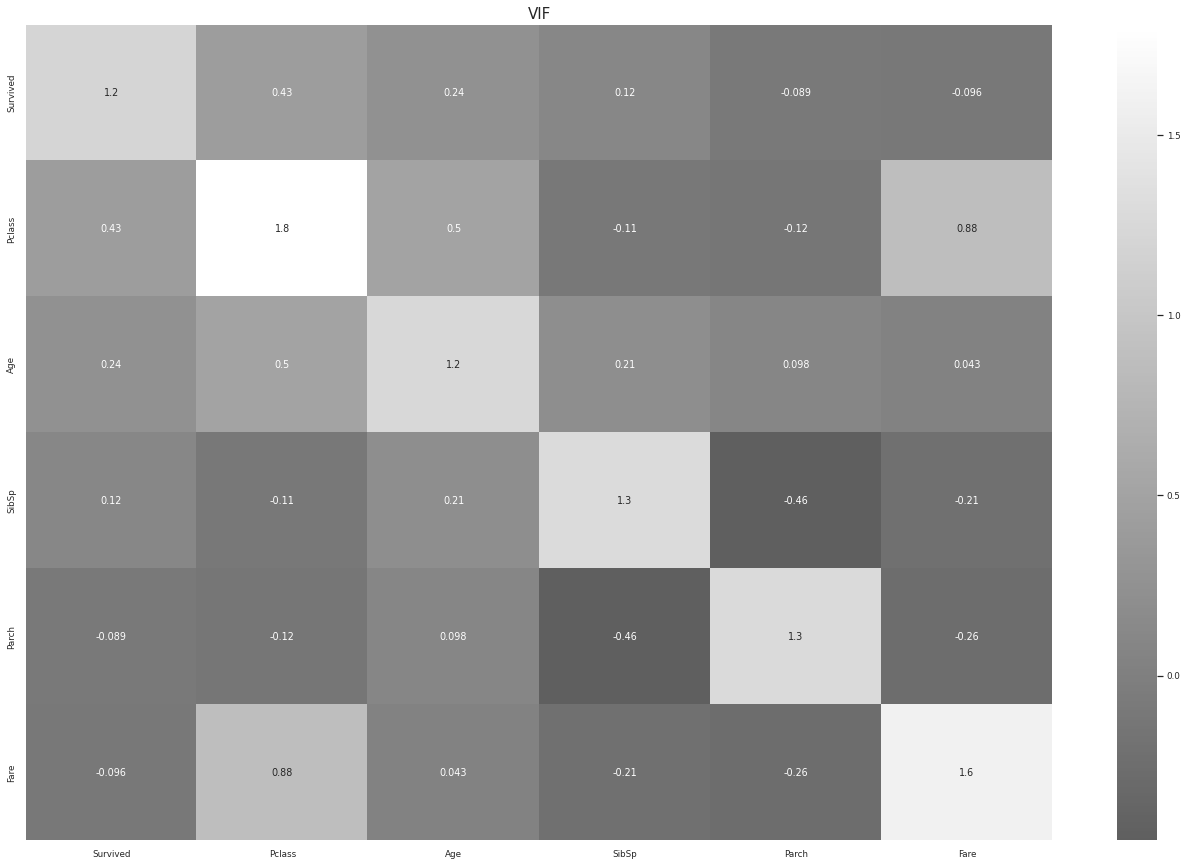

In [31]:
#Visualzing the VIF Score

vif = pd.DataFrame(np.linalg.inv(multicollinearity.values),index=multicollinearity.index,columns=multicollinearity.columns )
plt.figure(figsize = (23, 15))
sns.heatmap(vif, annot = True, center = 0, cmap="gist_gray")
plt.title('VIF', fontsize = 15)
plt.show()









# Modelling









---




## K-Nearest Neighbour Classifier


---






In [38]:
# converting sex and embarked to categorical datatypes

train_1['Sex'] = train_1['Sex'].astype('category')
train_1['Embarked'] = train_1['Embarked'].astype('category')

In [39]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

train_1['Sex'] = le.fit_transform(train_1['Sex'])
train_1['Embarked'] = le.fit_transform(train_1['Embarked'])

train_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2




---


# Using 80-20 split


---






In [40]:


# split the data into labels and features

X = train_1.iloc[:, 1:].values
y= train_1['Survived']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()



,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.307263
std,0.488073,0.462653
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [41]:
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))



Mean Absolute Error: 0.2569832402234637
Mean Squared Error: 0.2569832402234637
Root Mean Squared Error: 0.506935144001147
The accuracy of the model is  0.7430167597765364

 Confusion matrix
[[94 16]
 [30 39]]


Using 5 k neighbours in this model we get an accuracy of 74.3% which is a fair number.

We will challenge this solution by using different values of k below.

## Challenging the 80-20 solution

In challenging the solution, we will be using different values of k neighbours to see which one gives us the best accuracies. 

 We will be using 3 , 7 , 9 , 12 and 15 as our k neighbors
 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [ 3, 7, 9, 12, 15, 25]

for i in k_values:
  clf = KNeighborsClassifier(n_neighbors = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("The results after using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred))
  print("\n")
  print("_____________________")


The results after using 3 as the k value.
Accuracy score: 0.7988826815642458


_____________________
The results after using 7 as the k value.
Accuracy score: 0.8044692737430168


_____________________
The results after using 9 as the k value.
Accuracy score: 0.7932960893854749


_____________________
The results after using 12 as the k value.
Accuracy score: 0.8212290502793296


_____________________
The results after using 15 as the k value.
Accuracy score: 0.8100558659217877


_____________________
The results after using 25 as the k value.
Accuracy score: 0.8156424581005587


_____________________


After changing the k values, we get that using 12 k neighbors is the best option for this model since we get 82.1% which is the highest.

This is also better than using 5 k neghbours.



---


# Using 70-30 split


---







In [43]:
# split the data into labels and features

X = train_1.iloc[:, 1:].values
y= train_1['Survived']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,268.000000,268.000000
mean,0.373134,0.313433
std,0.484542,0.464757
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [44]:
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))


Mean Absolute Error: 0.2835820895522388
Mean Squared Error: 0.2835820895522388
Root Mean Squared Error: 0.5325242619376499
The accuracy of the model is  0.7164179104477612

 Confusion matrix
[[138  30]
 [ 46  54]]


When using 5 as the k neighbour in this model we get an accurace score of 71.6% which is a fair score.

We will challenge this solution by changing the no of k neighbours below.

## Challenging the 70-30 solution

 In challenging the solution, we will be using different values of k neighbours to see which one gives us the best accuracies. 

 We will be using 3 , 7 , 9 , 12 ,15 and 25 as our k neighbors
 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [ 3, 7, 9, 12, 15, 25]

for i in k_values:
  clf = KNeighborsClassifier(n_neighbors = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("The results after using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred))
  print("\n")
  print("_____________________")


The results after using 3 as the k value.
Accuracy score: 0.7947761194029851


_____________________
The results after using 7 as the k value.
Accuracy score: 0.7947761194029851


_____________________
The results after using 9 as the k value.
Accuracy score: 0.7985074626865671


_____________________
The results after using 12 as the k value.
Accuracy score: 0.7910447761194029


_____________________
The results after using 15 as the k value.
Accuracy score: 0.7873134328358209


_____________________
The results after using 25 as the k value.
Accuracy score: 0.7835820895522388


_____________________


After we change the no of k neighbors we can see that using k too be 9 is the best for this 30-70 model with an accuracy of 79.9 %

This is also better than using 5 k neghbours.



---


# Using 60-40 split


---







In [46]:
# split the data into labels and features

X = train_1.iloc[:, 1:].values
y= train_1['Survived']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,357.000000,357.000000
mean,0.380952,0.341737
std,0.486302,0.474957
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [47]:
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n') 
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))

Mean Absolute Error: 0.2857142857142857
Mean Squared Error: 0.2857142857142857
Root Mean Squared Error: 0.5345224838248488
The accuracy of the model is  0.7142857142857143


Confusion matrix
[[177  44]
 [ 58  78]]


When using 5 as the k neighbour in this model we get an accurace score of 71.4% which is a fair score.

We will challenge this solution by changing the no of k neighbours below.










## Challenging the 60-40 solution








 In challenging the solution, we will be using different values of k neighbours to see which one gives us the best accuracies. 

 We will be using 3 , 7 , 9 , 12 ,15 and 25 as our k neighbors


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 25)

# Scaling the variables 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_values = [ 3, 7, 9, 12, 15, 25]

for i in k_values:
  clf = KNeighborsClassifier(n_neighbors = i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("The results after using {} as the k value.".format(i))
  print("Accuracy score:",accuracy_score(y_test, y_pred))
  print("\n")
  print("_____________________")


The results after using 3 as the k value.
Accuracy score: 0.7703081232492998


_____________________
The results after using 7 as the k value.
Accuracy score: 0.7815126050420168


_____________________
The results after using 9 as the k value.
Accuracy score: 0.7843137254901961


_____________________
The results after using 12 as the k value.
Accuracy score: 0.7871148459383753


_____________________
The results after using 15 as the k value.
Accuracy score: 0.7815126050420168


_____________________
The results after using 25 as the k value.
Accuracy score: 0.7703081232492998


_____________________


After we change the no of k neighbors we can see that using k too be 12 is the best for this 40-60 model with an accuracy of 78.7%.

This is also better than using 5 k neghbours.

# Conclusion

After creating and testing the accuracy scores of all our models we come to a conclusion that;

* In the 80-20 model , using 12 as the k nearest neighbours gives us the best accuracy scores hence is better.

* In the 70-30 model , using 9 as the k nearest neighbours gives us the best accuracy scores hence is better.

* In the 60-40 model , using 12 as the k nearest neighbours gives us the best accuracy scores hence is better.

But in general we wolud recommend that for best results, using the first 80-20 model with 12 k neighbours gives the best accuracy scores compared to all models.
